In [1]:
from utils import *
import utils

%load_ext autoreload
# %reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from proto import caffe_pb2

In [3]:
os.chdir('/home/wangxinglu/prj/few-shot/src/')
# utils.init_dev(utils.get_dev())
# utils.allow_growth()
import os 
os.chdir('/home/wangxinglu/prj/few-shot/models/res101.img1k')
%pwd

u'/mnt/nfs1703/test/prj/few-shot/models/res101.img1k'

In [45]:
ori_size_img_path = '/home/imagenet/ilsvrc12_val_lmdb/'

import lmdb
ori_size_img_lmdb = lmdb.open(ori_size_img_path)
txn = ori_size_img_lmdb.begin()
cursor = txn.cursor()

In [95]:
pc = cursor
pc.first()

True

33108

True

970

(256, 256, 3)

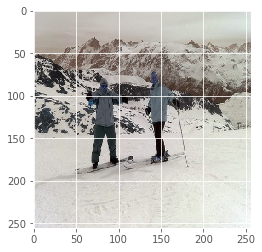

In [97]:
datum = caffe_pb2.Datum()
datum.ParseFromString(pc.value())
pc.next()
lbs.append(datum.label)

import cv2

im_buf = np.fromstring(datum.data, dtype=np.uint8)
ori_im = cv2.imdecode(im_buf, cv2.CV_LOAD_IMAGE_COLOR)
datas.append()
ori_im.shape
# plt.imshow(ori_im)


In [6]:
!wc -l /home/wangxinglu/prj/few-shot/data/imglst/img1k.test.txt
!wc -l /home/wangxinglu/prj/few-shot/data/imglst/img10k.test.txt

58088 /home/wangxinglu/prj/few-shot/data/imglst/img1k.test.txt
602017 /home/wangxinglu/prj/few-shot/data/imglst/img10k.test.txt


In [ ]:
lbs,datas,fcs=[],[],[]
ind=0
while ind<602017:
    f.feed()
    f.forward()
    lbs.append(f.data('label').value())
#     datas.append(f.data('data').value()) 
    fcs.append(f.data('fc').value())
    ind+=lbs[-1].shape[-1]

In [21]:
lb=np.concatenate(lbs,axis=-1)
fc=np.concatenate(fcs,axis=-1)

pred=np.argmax(fc,axis=0)
pred.shape

lb=lb.reshape((lb.shape[-1],))
lb.shape

In [112]:
os.chdir('/home/wangxinglu/prj/few-shot/src/')

from gen_imglst import * 

from metadata import *


names,nimgs=cls_sample(1000)
ind2name={ind:name for ind,name in enumerate(names)}
name2ind={name:ind for ind,name in enumerate(names)}
sum(nimgs.astype(int))

576243

In [ ]:
names[:10],names[-10:]

(array([-0.5,  0.5,  1.5]), array([ 997.5,  998.5,  999.5]))

(1000,)

(1.0, 1)

(238.0, 238)

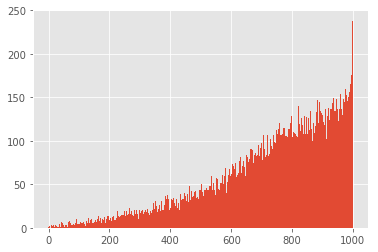

In [203]:
cnts,bounds,_=plt.hist(lb,bins=1000,range=(-0.5,1000-0.5))
bounds[:3],bounds[-3:]
cnts.shape
cnts[0],len(lb[lb==0])
cnts[-1],len(lb[lb==999])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


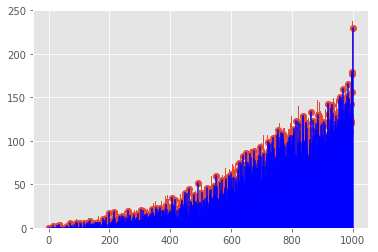

In [211]:
cnts,bounds,_=plt.hist(lb,bins=1000,range=(-0.5,1000-0.5))
markerline, stemlines, baseline =plt.stem(cnts*np.diag(conf)/cnts)
_=plt.setp(baseline, 'color', 'b')
_=plt.setp(stemlines,'color','b')
# plt.plot(cnts*np.diag(conf)/cnts)

In [214]:
np.mean(lb==pred)

np.nanmean(np.diag(conf)/cnts)

plt.hist(lb)

np.nanmean(np.diag(conf)/cnts)

0.68580034423407921

(array([   336.,    781.,   1451.,   2313.,   3536.,   5038.,   7741.,
         10556.,  12088.,  14260.]),
 array([   0. ,   99.9,  199.8,  299.7,  399.6,  499.5,  599.4,  699.3,
         799.2,  899.1,  999. ]),
 <a list of 10 Patch objects>)

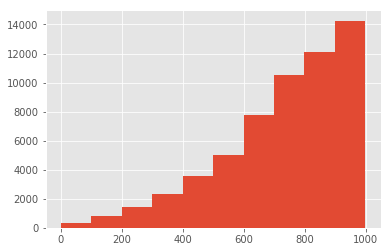

In [41]:
plt.hist(lb)

In [116]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(lb, pred,np.arange(0,1000)).astype(float)
conf.shape

(1000, 1000)

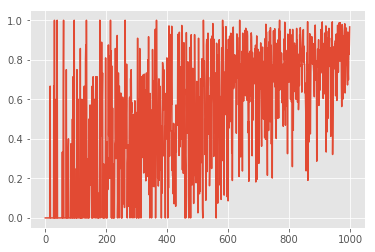

In [195]:
plt.plot(np.diag(conf)/cnts)

(967, 990)

array([[ nan,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,  nan,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,  nan, ...,   0.,   0.,   0.],
       ..., 
       [  0.,   0.,   0., ...,  nan,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,  nan,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,  nan]])

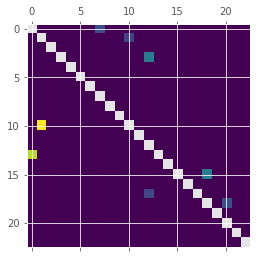

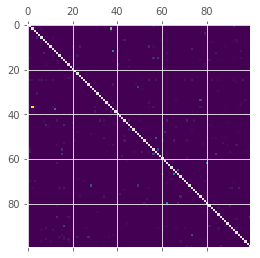

In [194]:
ind=np.random.randint(low=0,high=1000)
indend=np.random.randint(ind,high=1000)
ind,indend
ind=int(ind)
indend=int(indend)
cnts[cnts==0]=1
res=conf/cnts
np.fill_diagonal(res,np.nan)
res
plt.matshow(res[ind:indend,ind:indend])
plt.figure()
plt.matshow(res[-100:,-100:])

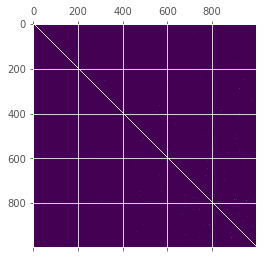

In [40]:
np.fill_diagonal(conf,np.nan)
plt.matshow(conf)

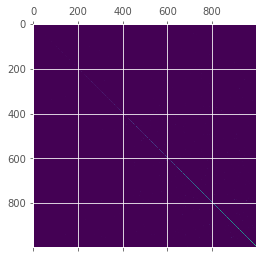

In [31]:
plt.matshow(conf)

In [ ]:
# write the model file to work dir
model_bak = os.path.join(self.runner.work_dir, 'model.yaml')
with open(model_bak, 'w') as fout:
    fout.write(self.runner.model.to_yaml_text())
# write the session config file to work dir
session_bak = os.path.join(self.runner.work_dir, 'session.yaml')
self.runner.config.dump(session_bak, model={'yaml': 'model.yaml'})
self.runner.setup()
# log model info
logging.info("model name: %s", self.runner.model.name)
logging.debug(self.runner.model.to_yaml_text())
# run!
self.runner.run()